In [2]:
import cv2
import numpy as np


img = cv2.imread('./hat_1/page_15.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 2)
kernel = np.ones((4,4),np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 2)

In [3]:
edged = cv2.Canny(dilation, 30, 200)

In [4]:
cnt, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


295 62071.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

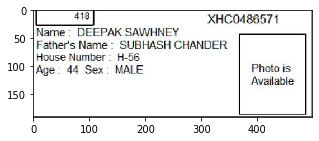

In [8]:
for i in range(len(cnt)):

    area = cv2.contourArea(cnt[i])
    if area>36000 and area<100000 and i<296: 
        print(i, area)
        x,y,w,h = cv2.boundingRect(cnt[i])
        crop= img[ y:h+y,x:w+x]
        plt.figure(figsize= (5,5))
        plt.imshow(crop)
        plt.show()
        cv2.imwrite('cropped' + fileName[i] + '_'+ '.jpg', crop)
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

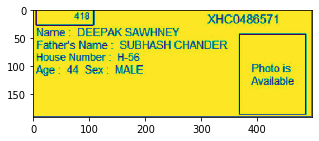

In [12]:
        plt.figure(figsize= (5,5))
        plt.imshow(gray)
        plt.show()

In [15]:
import cv2
import numpy as np
import pytesseract


# Load image, create mask, grayscale, Otsu's threshold
# image = cv2.imread('1.png')
mask = np.zeros(crop.shape, dtype=np.uint8)
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [ ]:
# Filter for ROI using contour area and aspect ratio
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.05 * peri, True)
    x,y,w,h = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)
    if area > 2000 and aspect_ratio > .5:
        mask[y:y+h, x:x+w] = crop[y:y+h, x:x+w]

# Perfrom OCR with Pytesseract
data = pytesseract.image_to_string(mask, lang='eng', config='--psm 6')
print(data)

cv2.imshow('thresh', thresh)
cv2.imshow('mask', mask)
cv2.waitKey()

an XHC0486571
Name : DEEPAK SAWHNEY
Father's Name : SUBHASH CHANDER
House Number : H-56
Age: 44 Sex: MALE Photo is
Available

